In [ ]:
!pip install pandas

In [ ]:
# Check the pandas version
import pandas as pd
print(pd.__version__)

# If you suspect a corrupted installation, try reinstalling
# !pip uninstall pandas
# !pip install pandas

2.2.2




cancer_df = pd.read_csv('cell_samples.csv')

cancer_df

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cancer_df = pd.read_csv('/content/cell_samples.csv')

cancer_df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


# Exploratory Data Analysis

#This is the description of the features of the dataset:


Sample code number (id number): Unique ID for each tumor sample (not used for classification).

Clump Thickness (1-10): How thick the cell clusters are (higher = more likely malignant).

Uniformity of Cell Size (1-10): Consistency of cell size (higher variation = more likely malignant).

Uniformity of Cell Shape (1-10): Consistency of cell shape (higher variation = more likely malignant).

Marginal Adhesion (1-10): How well cells stick together (lower adhesion = more likely malignant).

Single Epithelial Cell Size (1-10): Size of individual cells (larger = more likely malignant).

Bare Nuclei (1-10): Frequency of nuclei without cytoplasm (more frequent = more likely malignant).

Bland Chromatin (1-10): Texture of DNA material in the nucleus (more abnormal/clumped = more likely malignant).

Normal Nucleoli (1-10): Prominence of structures in the nucleus (more prominent = more likely malignant).

Mitoses (1-10): Rate of cell division (higher rate = more likely malignant).

Class (2 or 4): Whether the tumor is benign (2) or malignant (4).



#Exploratory Data Analysis

In [ ]:
cancer_df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [ ]:
cancer_df.tail()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [ ]:
print("Shape of the dataset:", cancer_df.shape)


Shape of the dataset: (699, 11)


In [ ]:
 #Check for missing values
print("\nMissing values:")
print(cancer_df.isnull().sum())



Missing values:
ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64


#Statistical summary
print(cancer_df.describe())

In [ ]:
print("\Info about each column:")
print(cancer_df.describe())

\Info about each column:
                 ID       Clump    UnifSize   UnifShape     MargAdh  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

       SingEpiSize  BlandChrom    NormNucl         Mit       Class  
count   699.000000  699.000000  699.000000  699.000000  699.000000  
mean      3.216023    3.437768    2.866953    1.589413    2.689557  
std       2.214300    2.438364    3.053634    1.715078    0.951273  
min       1.000000    1.000000    1.000000    1.000000    2

In [ ]:
cancer_df["BareNuc"].unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [ ]:
cancer_df["BlandChrom"].median()

NameError: name 'cancer_df' is not defined

In [ ]:
# Impute missing values with the median (alternative: mean)
cancer_df_imputed = cancer_df.copy()
# Replace '?' with NaN to allow median calculation
cancer_df_imputed['BareNuc'] = pd.to_numeric(cancer_df_imputed['BareNuc'], errors='coerce')
cancer_df_imputed['BareNuc'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7., nan,  5.,  8.,  6.])

In [ ]:
cancer_df_imputed['BareNuc'] = cancer_df_imputed['BareNuc'].fillna(1)
print(f"BareNuc median value used for imputation: {cancer_df_imputed['BareNuc'].median()}")

BareNuc median value used for imputation: 1.0


In [ ]:
cancer_df_imputed['BareNuc'].unique()

array([ 1., 10.,  2.,  4.,  3.,  9.,  7.,  5.,  8.,  6.])

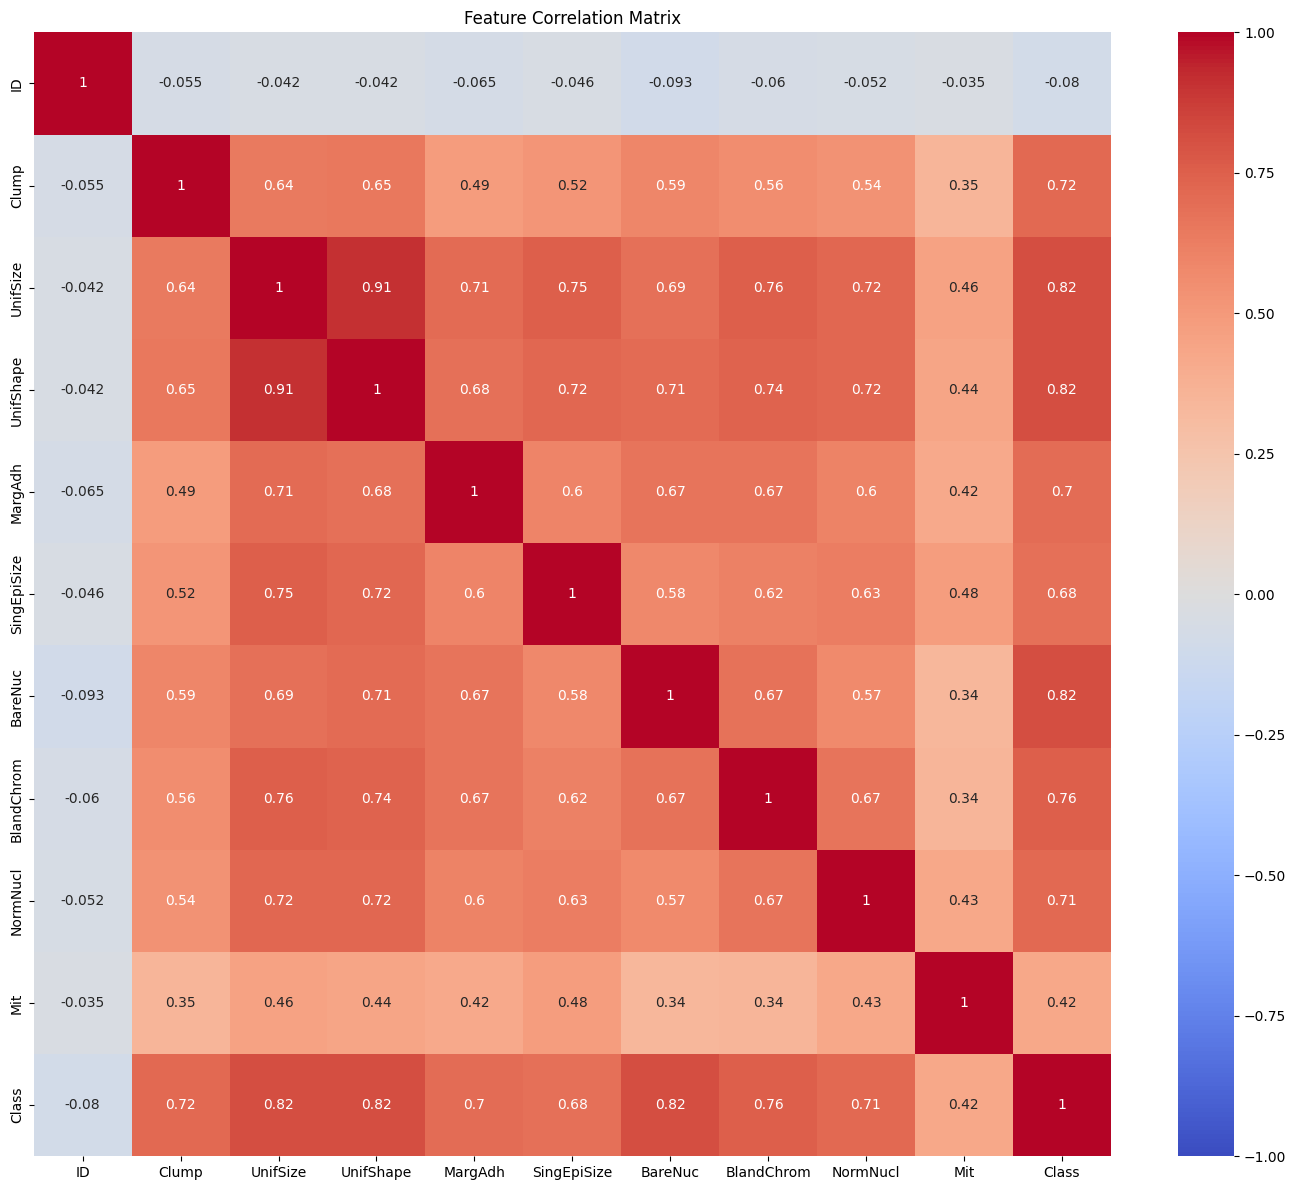

In [ ]:
plt.figure(figsize=(14, 12))
corr = cancer_df_imputed.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

The Pearson correlation coefficient ranges from -1 to 1, indicating the strength and direction of a linear relationship:

Close to 1: Strong positive correlation (as one feature increases, the other tends to increase).

Close to -1: Strong negative correlation (as one feature increases, the other tends to decrease).

Close to 0: Weak or no linear correlation.

Column: ID

The 'ID' column shows very little to no correlation with any of the other features. This is expected as 'ID' is just a unique identifier for each sample and doesn't carry any biological information related to the tumor characteristics or class.

In [ ]:
cancer_df_imputed.drop(columns=['ID'], inplace=True)
cancer_df_imputed

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,2
695,2,1,1,1,2,1.0,1,1,1,2
696,5,10,10,3,7,3.0,8,10,2,4
697,4,8,6,4,3,4.0,10,6,1,4


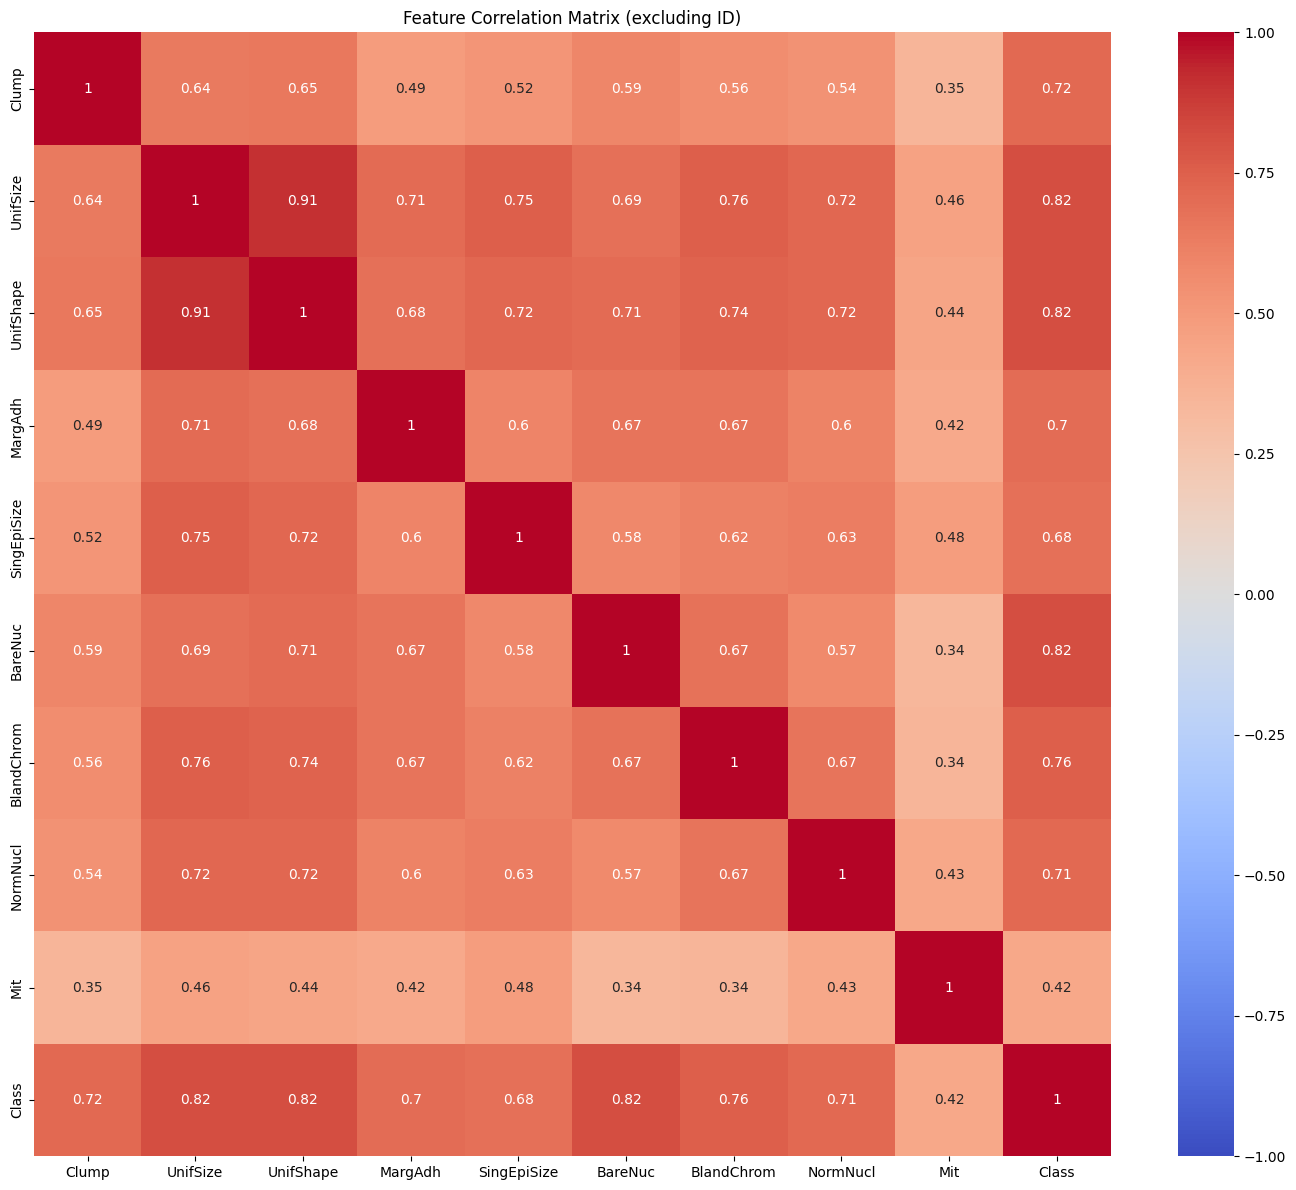

In [ ]:
plt.figure(figsize=(14, 12))
import seaborn as sns

# Remove 'ID' column before calculating correlation
corr = cancer_df_imputed.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Feature Correlation Matrix (excluding ID)')
plt.tight_layout()
plt.show()

'UnifSize' has a strong positive correlation with'UnifShape',This indicates that greater uniformity in cell size is associated with greater uniformity in cell shape.

*Multicollinearity*: In linear models (like linear regression or logistic regression), high correlation between predictor variables can lead to unstable coefficient estimates, making the model harder to interpret. It can inflate the variance of the coefficients, making it difficult to determine the true effect of each variable.


#Delete UnifShape column

In [ ]:
cancer_df_imputed.drop(columns=['UnifShape'], inplace=True)


In [ ]:
cancer_df_imputed


,Clump,UnifSize,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,2,1.0,3,1,1,2
1,5,4,5,7,10.0,3,2,1,2
2,3,1,1,2,2.0,3,1,1,2
3,6,8,1,3,4.0,3,7,1,2
4,4,1,3,2,1.0,3,1,1,2
...,...,...,...,...,...,...,...,...,...
694,3,1,1,3,2.0,1,1,1,2
695,2,1,1,2,1.0,1,1,1,2
696,5,10,3,7,3.0,8,10,2,4
697,4,8,4,3,4.0,10,6,1,4


In [ ]:
cancer_df_imputed["Class"].value_counts()

,count
Class,
2,458
4,241


/tmp/ipython-input-21-3640589517.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=cancer_df_imputed, palette='Set2')


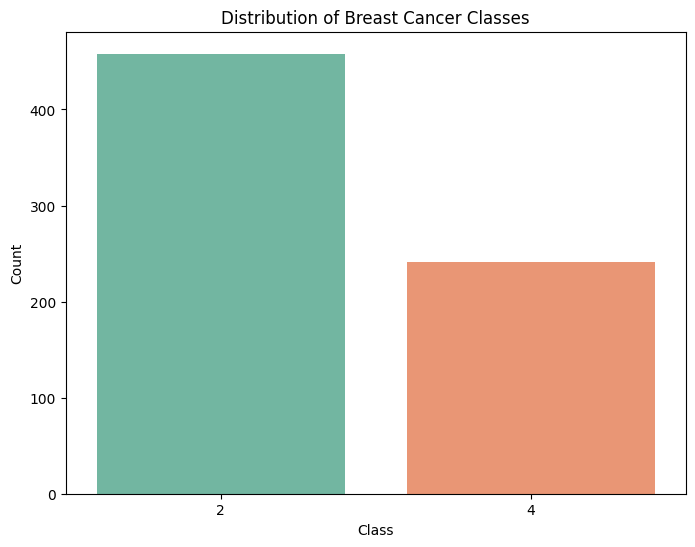

In [ ]:
# Class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=cancer_df_imputed, palette='Set2')
plt.title('Distribution of Breast Cancer Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

/tmp/ipython-input-22-1855508135.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class', data=cancer_df_imputed, palette='Set2')  # Assign 'Class' to hue, dodge=False to prevent bar separation
/tmp/ipython-input-22-1855508135.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Benign', 'Malignant'])  # Rename x-axis labels


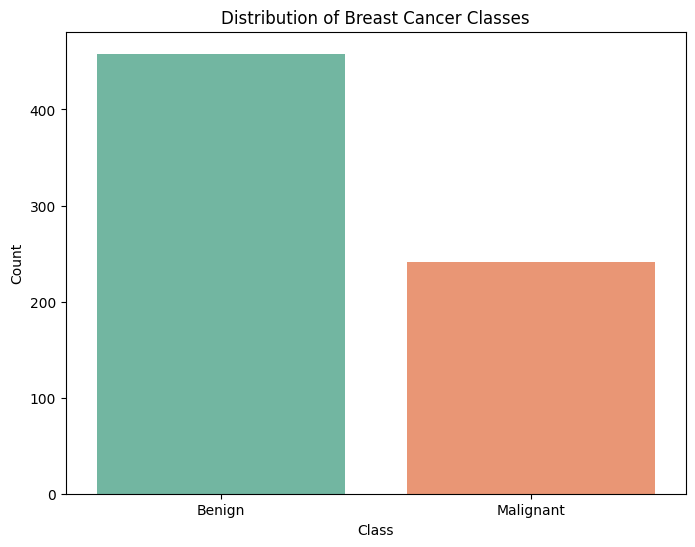

In [ ]:
# Class distribution
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Class', data=cancer_df_imputed, palette='Set2')  # Assign 'Class' to hue, dodge=False to prevent bar separation
plt.title('Distribution of Breast Cancer Classes')
plt.xlabel('Class')
plt.ylabel('Count')
ax.set_xticklabels(['Benign', 'Malignant'])  # Rename x-axis labels
plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is 'cancer_df' and the target variable is 'Class'
# Replace 'cancer_df' and 'Class' with your actual DataFrame and target column name

# Separate features (X) and target (y)
X = cancer_df_imputed.drop('Class', axis=1)
y = cancer_df_imputed['Class']

# Split the data into training and testing sets (it's crucial to oversample ONLY the training data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Original training class distribution:", Counter(y_train))
print("Original testing class distribution:", Counter(y_test))

# Initialize the RandomOverSampler
ros = RandomOverSampler(random_state=42)  # Set a random_state for reproducibility

# Fit and resample the training data
X_resampled_train, y_resampled_train = ros.fit_resample(X_train, y_train)

print("Resampled training class distribution (RandomOverSampler):", Counter(y_resampled_train))

# Now, X_resampled_train and y_resampled_train contain the oversampled training data
# You can use this resampled data to train your machine learning model



Original training class distribution: Counter({2: 363, 4: 196})
Original testing class distribution: Counter({2: 95, 4: 45})
Resampled training class distribution (RandomOverSampler): Counter({2: 363, 4: 363})


In [ ]:
X_resampled_train

,Clump,UnifSize,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,2,1,2,1.0,3,1,1
1,5,3,4,2,4.0,3,4,1
2,1,1,2,2,1.0,3,1,1
3,5,1,1,2,1.0,2,1,1
4,2,1,2,2,1.0,2,1,1
...,...,...,...,...,...,...,...,...
721,7,6,8,10,10.0,9,5,3
722,10,2,1,2,6.0,1,1,2
723,4,5,10,4,10.0,7,5,8
724,4,2,5,3,8.0,7,6,1


In [ ]:
y_resampled_train

,Class
0,2
1,4
2,2
3,2
4,2
...,...
721,4
722,4
723,4
724,4


In [ ]:
X_resampled_train.value_counts()

Clump  UnifSize  MargAdh  SingEpiSize  BareNuc  BlandChrom  NormNucl  Mit
1      1         1        2            1.0      2           1         1      25
                                                1           1         1      24
3      1         1        2            1.0      2           1         1      19
1      1         1        2            1.0      3           1         1      18
5      1         1        2            1.0      1           1         1      13
                                                                             ..
1      1         1        2            1.0      1           1         8       1
10     10        10       6            10.0     8           1         5       1
                          7            10.0     7           10        4       1
1      1         1        1            1.0      1           3         1       1
                          2            1.0      2           1         2       1
Name: count, Length: 347, dtype: int64

In [ ]:
X_test

,Clump,UnifSize,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
158,1,1,1,3,1.0,1,1,1
499,4,1,1,2,1.0,2,1,1
396,3,1,1,2,1.0,3,1,1
155,5,5,6,3,10.0,3,1,1
321,3,1,1,2,1.0,3,1,1
...,...,...,...,...,...,...,...,...
24,1,1,1,2,1.0,3,1,1
218,6,10,7,6,4.0,8,10,2
431,5,1,3,4,1.0,3,2,1
281,2,1,2,2,1.0,3,1,1


In [ ]:
y_test

,Class
158,2
499,2
396,2
155,4
321,2
...,...
24,2
218,4
431,2
281,2


In [ ]:
y_test.value_counts()

,count
Class,
2,95
4,45


/tmp/ipython-input-30-3906642344.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Class', data=resampled_df, palette='Set2')
/tmp/ipython-input-30-3906642344.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Benign', 'Malignant'])


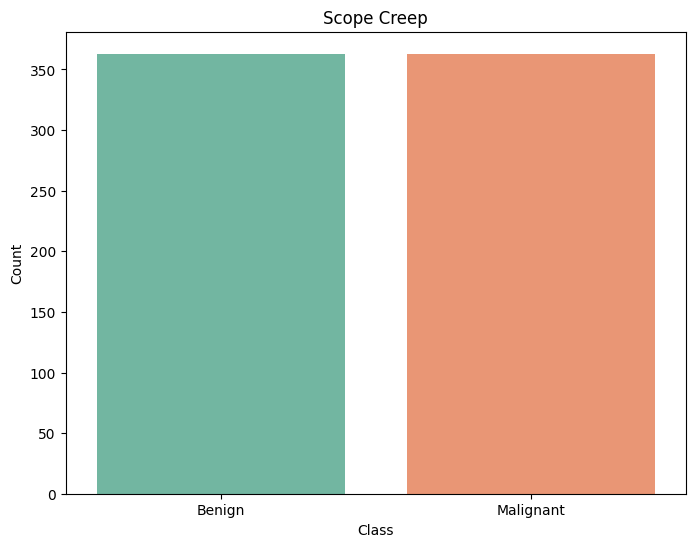

In [ ]:
plt.figure(figsize=(8, 6))
# Combine the resampled features and target into a new DataFrame for plotting
resampled_df = pd.concat([X_resampled_train, y_resampled_train], axis=1)
ax = sns.countplot(x='Class', data=resampled_df, palette='Set2')
plt.title('Scope Creep')
plt.xlabel('Class')
plt.ylabel('Count')
ax.set_xticklabels(['Benign', 'Malignant'])
plt.show()
# The test set (X_test, y_test) remains unchanged and should be used for final evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression

# 1. Create and train the Logistic Regression model:
model = LogisticRegression(random_state=42)  # Initialize the model
model.fit(X_resampled_train, y_resampled_train)  # Train using the resampled training data




In [ ]:
# 2. Make predictions on the test set:
y_pred = model.predict(X_test)
y_pred

array([2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2, 4, 4, 4, 4, 2,
       4, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2,
       4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 4,
       4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 4, 2, 4, 2, 2, 2])

In [ ]:
y_pred.shape

(140,)

In [ ]:
y_test


,Class
158,2
499,2
396,2
155,4
321,2
...,...
24,2
218,4
431,2
281,2


In [ ]:
# 3. Evaluate the model:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


In [ ]:
print(f"Accuracy: {accuracy*100} %")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 97.14285714285714 %
Confusion Matrix:
[[94  1]
 [ 3 42]]


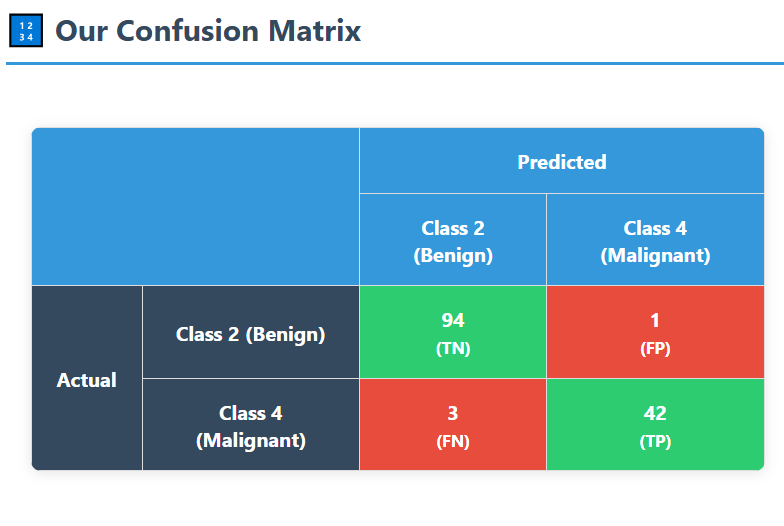

The sklearn.metrics.confusion_matrix function, by default, determines the order of classes (labels) by sorting them in ascending order.

In many breast cancer datasets (like the Wisconsin Breast Cancer dataset, which is a common benchmark), the classes are often encoded numerically:
2 typically represents "Benign"
4 typically represents "Malignant"

Since 2 is less than 4, scikit-learn will arrange them as [2, 4] for both the actual and predicted labels in the confusion matrix.



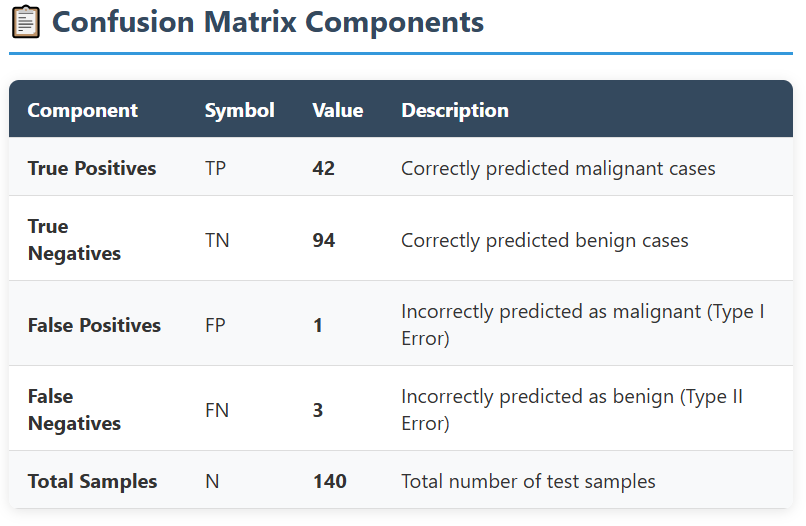

#Classification Report#

In [ ]:
print("\n===== Logistic Regression =====")
from sklearn.metrics import precision_score, recall_score, f1_score

precision_per_class = precision_score(y_test, y_pred, average=None)
recall_per_class = recall_score(y_test, y_pred, average=None)
f1_per_class = f1_score(y_test, y_pred, average=None)


benign_index = 0 # Assuming 'Benign' is the first class after sorting
malignant_index = 1 # Assuming 'Malignant' is the second class after sorting

print(f"Overall Accuracy: {accuracy:.4f}\n")

print("--- Metrics for Malignant Class ---")
print(f"Precision (Malignant): {precision_per_class[malignant_index]:.4f}")
print(f"Recall (Malignant): {recall_per_class[malignant_index]:.4f}")
print(f"F1-Score (Malignant): {f1_per_class[malignant_index]:.4f}")

print("\n--------------------------------------------------------------\n")
print("--- Metrics for Benign Class ---")
print(f"Precision (Benign): {precision_per_class[benign_index]:.4f}")
print(f"Recall (Benign): {recall_per_class[benign_index]:.4f}")
print(f"F1-Score (Benign): {f1_per_class[benign_index]:.4f}\n")


===== Logistic Regression =====
Overall Accuracy: 0.9714

--- Metrics for Malignant Class ---
Precision (Malignant): 0.9767
Recall (Malignant): 0.9333
F1-Score (Malignant): 0.9545

--------------------------------------------------------------

--- Metrics for Benign Class ---
Precision (Benign): 0.9691
Recall (Benign): 0.9895
F1-Score (Benign): 0.9792



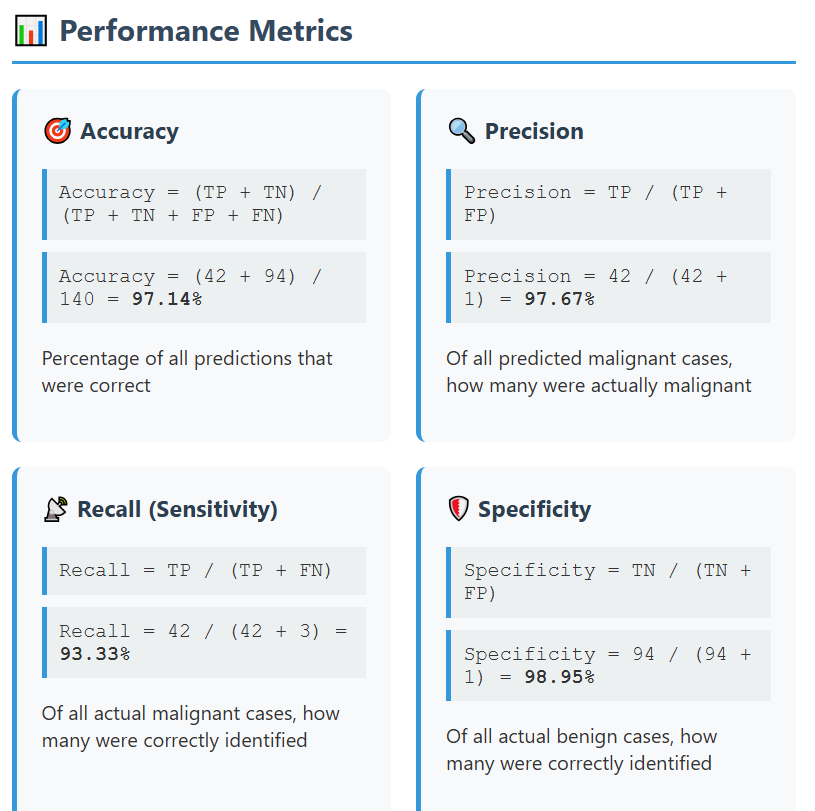

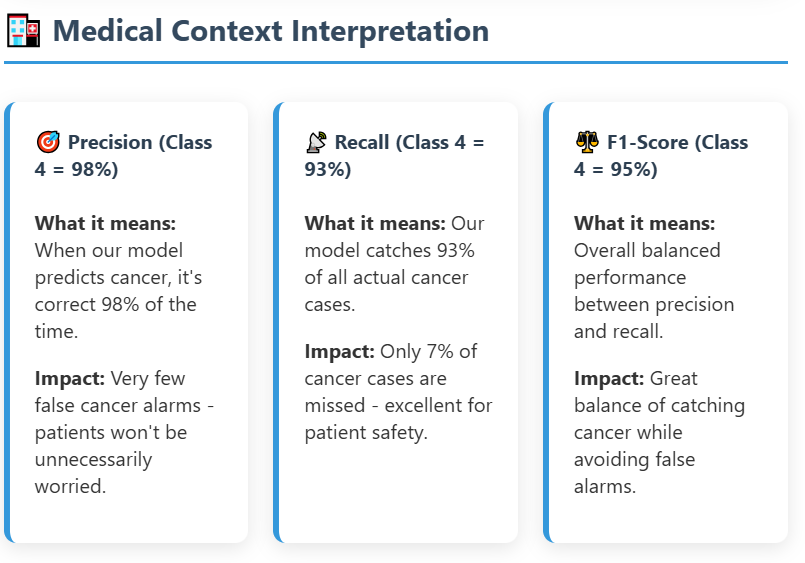

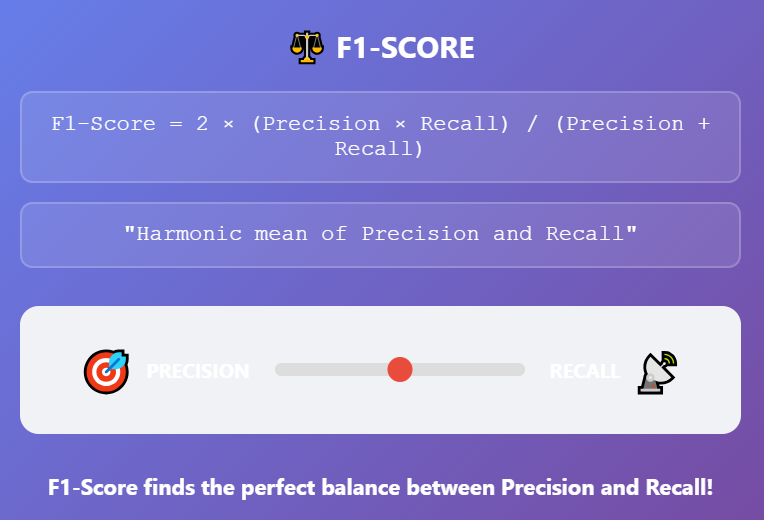

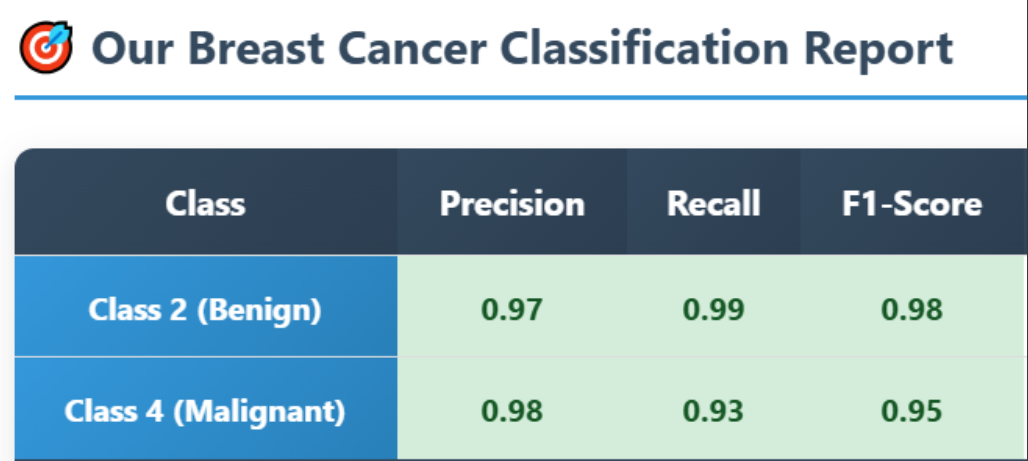

# Apply more models

#DECISION TREE#

In [ ]:
from sklearn.tree import DecisionTreeClassifier
print("\n===== DECISION TREE =====")

# Create and train the Decision Tree model without scaling
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_resampled_train, y_resampled_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
class_report_dt = classification_report(y_test, y_pred_dt)

print(f"Accuracy: {accuracy_dt:.4f}")
print("Confusion Matrix:")
print(conf_matrix_dt)
print("Classification Report:")
print(class_report_dt)


===== DECISION TREE =====
Accuracy: 0.9571
Confusion Matrix:
[[92  3]
 [ 3 42]]
Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.97      0.97        95
           4       0.93      0.93      0.93        45

    accuracy                           0.96       140
   macro avg       0.95      0.95      0.95       140
weighted avg       0.96      0.96      0.96       140



# XGBOOST CLASSIFIER #

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("\n===== XGBOOST CLASSIFIER =====")

# Create and train the XGBoost model
# Using the resampled training data
xgb = XGBClassifier(random_state=42)

# Map the target variable labels from 2 and 4 to 0 and 1
y_resampled_train_mapped = y_resampled_train.map({2: 0, 4: 1})
y_test_mapped = y_test.map({2: 0, 4: 1})


# Fit the model with the mapped target variable
xgb.fit(X_resampled_train, y_resampled_train_mapped)

# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test)

# Evaluate the model
# Use the mapped y_test for evaluation metrics as well
accuracy_xgb = accuracy_score(y_test_mapped, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test_mapped, y_pred_xgb)
class_report_xgb = classification_report(y_test_mapped, y_pred_xgb)

print(f"Accuracy: {accuracy_xgb:.4f}")
print("Confusion Matrix:")
print(conf_matrix_xgb)
print("Classification Report:")
print(class_report_xgb)


===== XGBOOST CLASSIFIER =====
Accuracy: 0.9643
Confusion Matrix:
[[94  1]
 [ 4 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        95
           1       0.98      0.91      0.94        45

    accuracy                           0.96       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140



XGBoost, like many other classification algorithms, typically expects integer labels starting from 0 for multiclass classification problems. Since this is a binary classification problem, it expects labels 0 and 1.



Looking at the notebook code, the original cancer_df has a 'Class' column with values 2 (Benign) and 4 (Malignant). This column is used as the target variable y. While oversampling with RandomOverSampler balances the class distribution, it does not change the class labels themselves.



To fix this, we need to map the class labels from 2 and 4 to 0 and 1 before training the XGBoost model. We can do this using the .map() method on the target variable Series.



In [ ]:
y_resampled_train_mapped
y_test_mapped

NameError: name 'y_resampled_train_mapped' is not defined

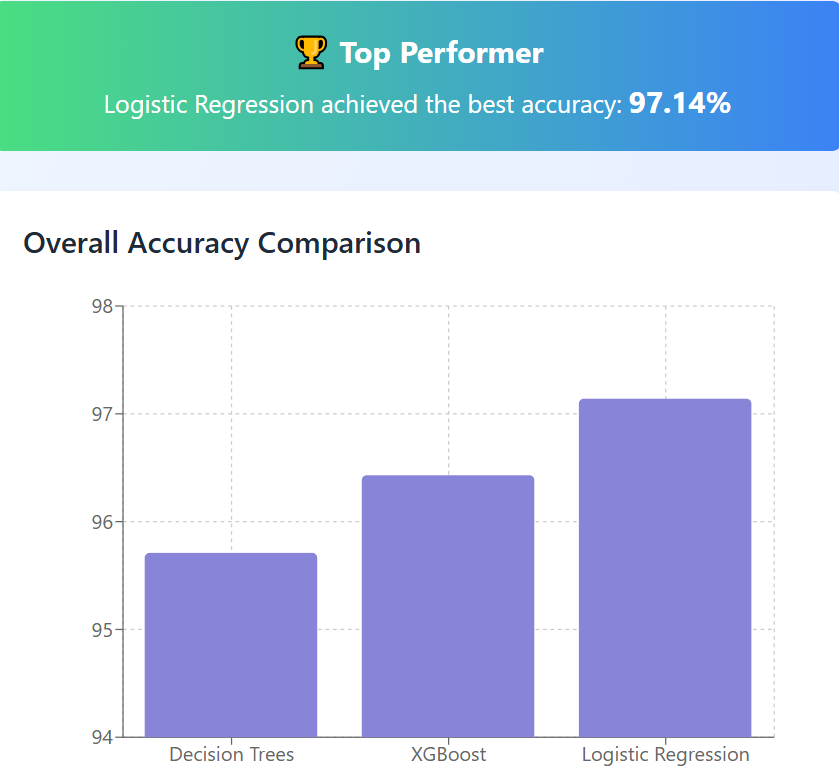

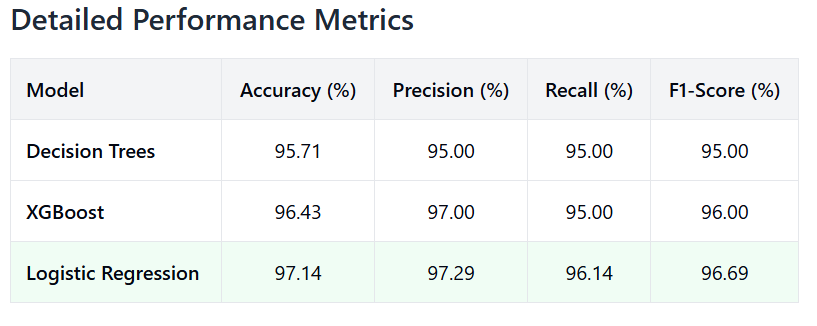